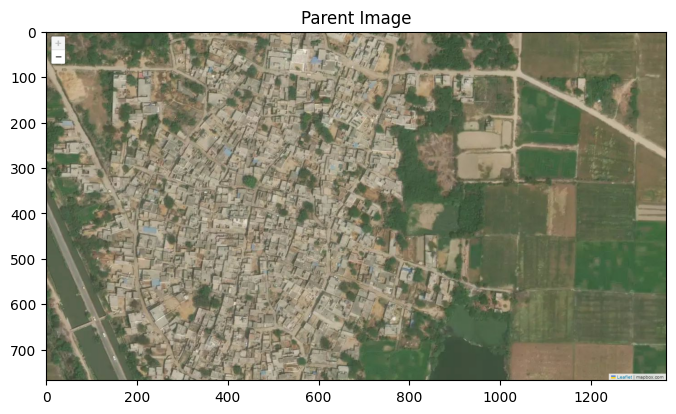

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the path to the parent image
parent_image_path = '/content/har_0.png'

# Load the parent image using Matplotlib
parent_img = mpimg.imread(parent_image_path)

# Plot the parent image
plt.figure(figsize=(8, 6))
plt.imshow(parent_img)
plt.title('Parent Image')
plt.show()


In [ ]:
import math

# Constants for Earth's radius (mean radius in meters)
earth_radius = 6371000  # Approximate value

# Function to convert meters to degrees
def meters_to_degrees(distance, is_latitude=True):
    if is_latitude:
        return distance / earth_radius * (180 / math.pi)
    else:
        # Calculate the circumference of a circle at a given latitude
        lat_in_radians = distance / earth_radius
        return distance / (earth_radius * math.cos(lat_in_radians)) * (180 / math.pi)

# Known latitude and longitude of the center of the parent image
parent_center_latitude = 28.7041  # Replace with the actual latitude of the parent image center
parent_center_longitude = 76.9707  # Replace with the actual longitude of the parent image center

# Width and height of the image (in meters)
image_width_meters = 1366  # Replace with the actual width of the image in meters
image_height_meters = 768  # Replace with the actual height of the image in meters

# Calculate d1 and d2 in degrees
d1_degrees = meters_to_degrees(image_width_meters / 3, is_latitude=False)
d2_degrees = meters_to_degrees(image_height_meters / 3, is_latitude=True)

# Calculate the longitude and latitude coordinates for the 9 points
x1 = parent_center_longitude
y1 = parent_center_latitude

coordinates = [
    (x1 - d1_degrees, y1 + d2_degrees),  # 1
    (x1, y1 + d2_degrees),  # 2
    (x1 + d1_degrees, y1 + d2_degrees),  # 3
    (x1 - d1_degrees, y1),  # 4
    (x1, y1),  # 5
    (x1 + d1_degrees, y1),  # 6
    (x1 - d1_degrees, y1 - d2_degrees),  # 7
    (x1, y1 - d2_degrees),  # 8
    (x1 + d1_degrees, y1 + d2_degrees)  # 9
]

# Print the longitude and latitude coordinates for the 9 points
for i, (lon, lat) in enumerate(coordinates, start=1):
    print(f"Point {i}: Longitude: {lon:.6f}, Latitude: {lat:.6f}")


Point 1: Longitude: 76.966605, Latitude: 28.706402
Point 2: Longitude: 76.970700, Latitude: 28.706402
Point 3: Longitude: 76.974795, Latitude: 28.706402
Point 4: Longitude: 76.966605, Latitude: 28.704100
Point 5: Longitude: 76.970700, Latitude: 28.704100
Point 6: Longitude: 76.974795, Latitude: 28.704100
Point 7: Longitude: 76.966605, Latitude: 28.701798
Point 8: Longitude: 76.970700, Latitude: 28.701798
Point 9: Longitude: 76.974795, Latitude: 28.706402


In [ ]:
import pandas as pd
import math

# Constants for Earth's radius (mean radius in meters)
earth_radius = 6371000  # Approximate value

# Function to convert meters to degrees
def meters_to_degrees(distance, is_latitude=True):
    if is_latitude:
        return distance / earth_radius * (180 / math.pi)
    else:
        # Calculate the circumference of a circle at a given latitude
        lat_in_radians = distance / earth_radius
        return distance / (earth_radius * math.cos(lat_in_radians)) * (180 / math.pi)

def calculate_smaller_image_coordinates(parent_latitude, parent_longitude, parent_width_meters, parent_height_meters):
    # Calculate d1 and d2 in degrees
    d1_degrees = meters_to_degrees(parent_width_meters / 3, is_latitude=False)
    d2_degrees = meters_to_degrees(parent_height_meters / 3, is_latitude=True)

    # Initialize a list to store the longitude and latitude coordinates for the 9 points
    coordinates = []

    # Iterate through each smaller rectangle and calculate coordinates
    for i in range(3):
        for j in range(3):
            x1 = j * d1_degrees
            y1 = i * d2_degrees

            # Calculate the longitude and latitude coordinates for the 9 points
            coordinates.append((parent_latitude + y1, parent_longitude - x1))

    return coordinates

# Path to the CSV file containing data for all 500 images
csv_file_path = '/content/output_file.csv'  # Replace with the actual path to your CSV file

# Output CSV file
output_csv = '/content/output_coordinates.csv'

# Read the CSV file
df = pd.read_csv(csv_file_path)

# Initialize a DataFrame to store the data
output_df = pd.DataFrame(columns=["Image", "Latitude", "Longitude"])

# Iterate through rows of the input CSV and calculate coordinates
for index, row in df.iterrows():
    image_name = row['labels']
    parent_center_latitude = row['city_latitude']
    parent_center_longitude = row['city_longitude']
    parent_image_width_meters = 1366  # Replace with the actual width of the parent image in meters
    parent_image_height_meters = 768  # Replace with the actual height of the parent image in meters

    # Calculate coordinates for the 9 smaller images
    image_data = calculate_smaller_image_coordinates(parent_center_latitude, parent_center_longitude, parent_image_width_meters, parent_image_height_meters)

    # Append the coordinates to the output DataFrame
    for i, (lat, lon) in enumerate(image_data, start=1):
        output_df = output_df.append({"Image": f"{image_name}_p{i}", "Latitude": lat, "Longitude": lon}, ignore_index=True)

# Save the output DataFrame to the output CSV file
output_df.to_csv(output_csv, index=False)
print(f"CSV file '{output_csv}' with coordinates has been created.")



Streaming output truncated to the last 5000 lines.
<ipython-input-23-b2f6f0be574e>:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({"Image": f"{image_name}_p{i}", "Latitude": lat, "Longitude": lon}, ignore_index=True)
<ipython-input-23-b2f6f0be574e>:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({"Image": f"{image_name}_p{i}", "Latitude": lat, "Longitude": lon}, ignore_index=True)
<ipython-input-23-b2f6f0be574e>:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_df = output_df.append({"Image": f"{image_name}_p{i}", "Latitude": lat, "Longitude": lon}, ignore_index=True)
<ipython-input-23-b2f6f0be574e>:60: FutureWarning: The frame.append method is deprecated

CSV file '/content/output_coordinates.csv' with coordinates has been created.
